Digit Recognizer 🚦 🎱
=====

Reference
- Kaggle 'Minimum Distance Classifier' by OLGA CHERNYTSKA : https://www.kaggle.com/code/olhacher/minimum-distance-classifier

In [48]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from ipycanvas import canvas
from Visualization import *

In [49]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Sample Visualization

In [50]:
label_1=X.loc[X['label']==1] # Slicing rows is label '1' 
label_1idx=label_1.index # Extract index of data 'label_1'

In [92]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(label_1idx),100) # 100 random samples of label '1'
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

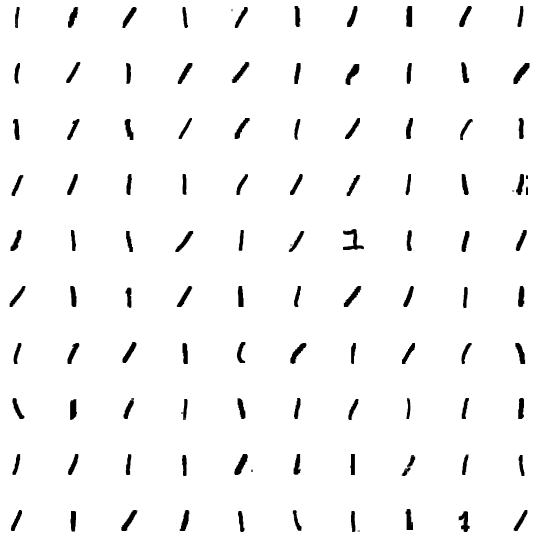

## Split Data

In [52]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [54]:
print(y_train.value_counts().sort_index())
print(y_train.count())
print(y_test.value_counts().sort_index())
print(y_test.count())

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


## Decreasing Size of Train Set
K-Means Clustering

In [90]:
digit = pd.DataFrame();
centroids = pd.DataFrame();
for i in range(0,10):
    digit = X_train.loc[X['label']==i]
    kmeans = sklearn.cluster.KMeans(n_clusters=50, init='k-means++',n_init=1, max_iter = 20).fit(digit)
    centroids = pd.concat([centroids,pd.DataFrame(kmeans.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t = centroids.iloc[:,1:]
y_t = centroids.iloc[:,0]
print(y_t.value_counts())

0    50
1    50
2    50
3    50
4    50
5    50
6    50
7    50
8    50
9    50
Name: 0, dtype: int64


### Cluster Centroid Visualization

In [126]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(X_t),100) # 100 random samples of cluster centroid
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

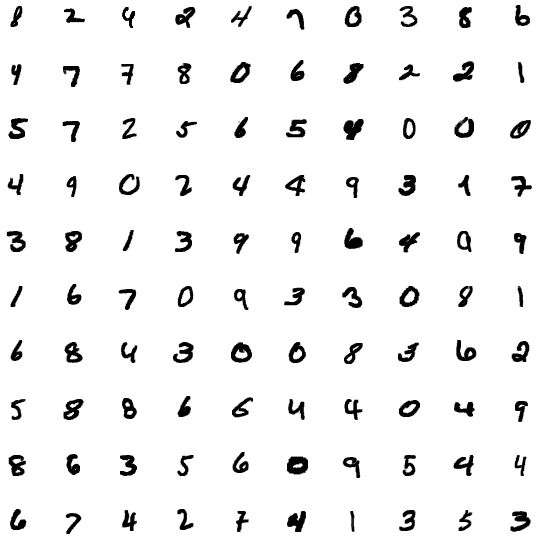

## Prediction

### Test Set

In [14]:
# Attempt to DataFrame : can Not use it
# d = pd.DataFrame();
# d_sum = pd.DataFrame();
# distances = pd.DataFrame();
# m = len(X_t);
# n = len(X_test);
# p_max = int(n / 500); # Max rows of Dataframe in Jypyterlab : 500
# range_op = 0; # for j range
# for j range
# for p in range(0,1): # 1 <- p_max
#    range_op1 = 500 * p
#    range_op2 = 500 * (p+1)

# for j in range(range_op1,range_op2):
#        d = (X_t.iloc[k,:] - X_test.iloc[j,1:])*(X_t.iloc[k,:] - X_test.iloc[j,1:])
#    d_sum = pd.DataFrame(d.sum(axis=1))
#    d_sum = d_sum.transpose()
#    distances = distances.append(pd.DataFrame(d_sum).astype(int), ignore_index=True)
# d.to_csv('TestData\d')
# d_sum.to_csv('TestData/d_sum')
# distances.to_csv('TestData/distances')

In [97]:
%%time
distances_test = np.array([]);
minidx_test = np.array([]);
m = len(X_t)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test = np.append(minidx_test, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test = np.append(distances_test,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 12min 20s


In [101]:
result_test = minidx_test // 50
zerocounts_test1 = result_test - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test))

accuracy(test_set):94.58%


In [99]:
result_table0 = pd.DataFrame([])
result_table0 = pd.concat([result_table0,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table0 = pd.concat([result_table0,pd.DataFrame(result_test).value_counts().sort_index()],axis=1).astype(int)
result_table0.index = ['0','1','2','3','4','5','6','7','8','9']
result_table0.columns = ['Prediction','Actual']
result_table0.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1028,1218,1052,1093,985,944,1062,1071,972,1075


#### Visualization : Test Set vs Cluster Centroid

##### Test Set

In [100]:
X_test2 = X_test.iloc[100:200,:]
Visualization(X, X_test2)

Canvas(height=560, sync_image_data=True, width=560)

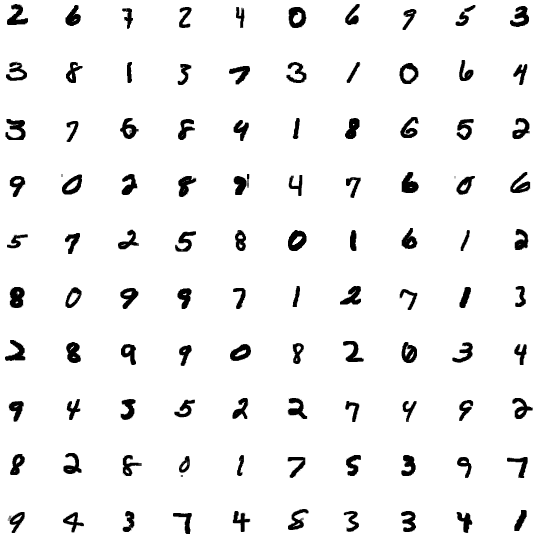

##### Cluster Centroid

In [88]:
X_t2 = X_t.iloc[minidx_test[100:200],:]
Visualization(X, X_t2)

Canvas(height=560, sync_image_data=True, width=560)

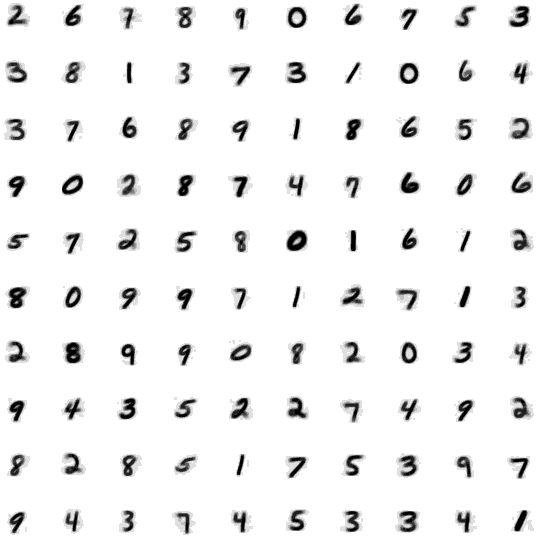

### Train Set

In [93]:
%%time
distances_train = np.array([]);
m = len(X_t)
n = len(X_train)
minidx_train = np.array([]);
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_train.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica)
        d_sum = d.sum(axis=1)
        minidx_train = np.append(minidx_train, np.argmin(d_sum)).astype(int)
        distances_train = np.append(distances_train,d_sum,axis=0).astype(int)

print('Complete.')       

Complete.
Wall time: 48min 46s


In [96]:
result_train = minidx_train // 50
zerocounts_train1 = result_train - y_train
zerocounts_train2 = len(zerocounts_train1[zerocounts_train1==0])
accuracy_train = (zerocounts_train2 / len(X_train)) * 100
print('accuracy(train_set):{:.2f}%'.format(accuracy_train))

accuracy(train_set):96.46%


In [95]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(y_train).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(result_train).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['Prediction','Actual']
result_table.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,3104,3498,3108,3230,3085,2871,3086,3326,3077,3115
Actual,3120,3579,3068,3193,3026,2874,3118,3304,3027,3191


## Experiments

### k-NN method

In [102]:
%%time
distances_test_part = pd.DataFrame([])
minidxgroup_test = np.array([])
result_test2 = np.array([])
p_max = int(len(distances_test) / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    
    distances_test_part = pd.DataFrame(distances_test[range_op1:range_op2])
    distances_test_part = distances_test_part.sort_values(by=0,axis=0)
    minidxgroup_test = distances_test_part.iloc[0:3,:].index
    minidxgroup_test = minidxgroup_test // 50
    value_set, value_count = np.unique(minidxgroup_test, return_counts = True)
    decision_test = value_set[value_count == value_count.max()]
    if len(decision_test) > 1:
        decision_test = decision_test[0]
    result_test2 = np.append(result_test2, decision_test).astype(int)

print('Complete.')

Complete.
Wall time: 4.51 s


In [103]:
zerocounts_test1_2 = result_test2 - y_test
zerocounts_test2_2 = len(zerocounts_test1_2[zerocounts_test1_2==0])
accuracy_test = (zerocounts_test2_2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test))

accuracy(test_set):93.47%


In [104]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(result_test2).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(y_test).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['prediction','actual']
result_table.transpose()

,0,1,2,3,4,5,6,7,8,9
prediction,1056,1261,1088,1131,997,900,1051,1023,932,1061
actual,1028,1186,1069,1121,987,924,1051,1075,986,1073


### Increasing Centroids (k-Means Method)

In [110]:
digit2 = pd.DataFrame();
centroids2 = pd.DataFrame();
for i in range(0,10):
    digit2 = X_train.loc[X['label']==i]
    kmeans2 = sklearn.cluster.KMeans(n_clusters=75, init='k-means++',n_init=1, max_iter = 20).fit(digit2)
    centroids2 = pd.concat([centroids2,pd.DataFrame(kmeans2.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t2 = centroids2.iloc[:,1:]
y_t2 = centroids2.iloc[:,0]
print(y_t2.value_counts())

0    75
1    75
2    75
3    75
4    75
5    75
6    75
7    75
8    75
9    75
Name: 0, dtype: int64


In [115]:
%%time
distances_test2 = np.array([]);
minidx_test2 = np.array([]);
m = len(X_t2)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t2 - replica)*(X_t2 - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test2 = np.append(minidx_test2, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test2 = np.append(distances_test2,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 20min


In [118]:
result_test2 = minidx_test2 // 75
zerocounts_test1 = result_test2 - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test2 = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test2))

accuracy(test_set):95.13%


In [120]:
result_table2 = pd.DataFrame([])
result_table2 = pd.concat([result_table2,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table2 = pd.concat([result_table2,pd.DataFrame(result_test2).value_counts().sort_index()],axis=1).astype(int)
result_table2.index = ['0','1','2','3','4','5','6','7','8','9']
result_table2.columns = ['Prediction','Actual']
result_table2.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1033,1207,1058,1098,987,930,1065,1080,971,1071


In [121]:
digit3 = pd.DataFrame();
centroids3 = pd.DataFrame();
for i in range(0,10):
    digit3 = X_train.loc[X['label']==i]
    kmeans3 = sklearn.cluster.KMeans(n_clusters=100, init='k-means++',n_init=1, max_iter = 20).fit(digit3)
    centroids3 = pd.concat([centroids3,pd.DataFrame(kmeans3.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t3 = centroids3.iloc[:,1:]
y_t3 = centroids3.iloc[:,0]
print(y_t3.value_counts())

0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
Name: 0, dtype: int64


In [122]:
%%time
distances_test3 = np.array([]);
minidx_test3 = np.array([]);
m = len(X_t3)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t3 - replica)*(X_t3 - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test3 = np.append(minidx_test3, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test3 = np.append(distances_test3,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 25min 15s


In [124]:
result_test3 = minidx_test3 // 100
zerocounts_test1 = result_test3 - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test3 = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test3))

accuracy(test_set):95.53%


In [125]:
result_table3 = pd.DataFrame([])
result_table3 = pd.concat([result_table3,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table3 = pd.concat([result_table3,pd.DataFrame(result_test3).value_counts().sort_index()],axis=1).astype(int)
result_table3.index = ['0','1','2','3','4','5','6','7','8','9']
result_table3.columns = ['Prediction','Actual']
result_table3.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1035,1215,1049,1104,995,943,1056,1074,959,1070
